# Support Vector Machine (SVM) para Análisis de Sentimientos
En el jupyter notebook se puede ver la construcción de un modelo SVM que predice el sentimiento de un comentario de redes sociales para dos productos ecuatorianos. Incluye la limpieza de datos, su preprocesamiento, preparación, construcción del modelo y evaluación del modelo.

In [ ]:
# Código desarrollado por: Camila Revelo, Joel Marín y Jordy Urquizo

# #1 Importación de librerías para usar¶
En esta celda se importan las librerías que se utilizarán durante el proyecto. Algunas de ellas viene incluidas con Anaconda, pero otras deben ser descargadas si no se lo ha hecho.

In [42]:
from sklearn import metrics
import numpy as np # linear algebra
import pandas as pd # data processing
import re, string, nltk
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from bs4 import BeautifulSoup

# Comprensión y limpieza de los datos
En esta fase se llevó a cabo la extracción y recopilación de los comentarios de los usuarios sobre dos productos específicos. Estos comentarios se derivaron de varias publicaciones en redes sociales como Facebook e Instagram.

In [2]:
#Se importa el set de datos a trabajar
data = pd.read_excel("TrainEcuadorFinal.xlsx")

#print head
data.head()

,tweetid,user,content,value,country,Polarity_Rating
0,NaN,NaN,"""Mi comentario es Delilú porque así lo quieres...",NEU,Ecuador,Neutral
1,NaN,NaN,#Delilú #mi dulce delilú no podría comérmelo s...,P,Ecuador,Positive
2,NaN,NaN,#Delilù es la mejor crema de chocolate😋😋 ami f...,P,Ecuador,Positive
3,NaN,NaN,#DelilúEnNavidad Mi Árbolito Navideño✨🎄🎄 junto...,P,Ecuador,Positive
4,NaN,NaN,#DelilúEnNavidad MI ARBOLITO 🎄 NAVIDEÑO CON UN...,P,Ecuador,Positive


In [ ]:
#Se limpian los comentarios, comenzando por definir las columnas útiles.
data_clean = data.copy()
data_clean['content_clean'] = data_clean['content'].apply(lambda x: BeautifulSoup(x, "lxml").text)
data_clean = data_clean.loc[:, ['content_clean', 'Polarity_Rating']]
data_clean.head()

# Preprocesamiento de los datos¶
A pesar de que los métodos de extracción utilizados para obtener comentarios de los usuarios en las redes sociales dan una tabla que incluye los comentarios en una columna (content), los datos de texto presentes allí no se pueden alimentar a un modelo de machine learning tal como está. Por lo tanto, se deben seguir algunos pasos de preprocesamiento para garantizar que la entrada al modelo desarrollado sea la óptima y que se generen menos características.

In [4]:
data_clean['content_clean'] = data_clean['content_clean'].apply(lambda x: re.split('https:\/\/.*', str(x))[0]) #elimina url

In [5]:
data_clean['content_clean'] = data_clean['content_clean'].apply(lambda x: re.split('\d+', str(x))[0]) #elimina palabras con numeros

In [6]:
#elimina palabras con letras repetidas
def conti_rep_char(str1):
    tchr = str1.group(0)
    if len(tchr) > 1:
      return tchr[0:1]
      
def check_unique_char(rep, sent_text):
    
    convert = re.sub(r'(\w)\1+', 
                     rep,
                     sent_text)
      
    # returing the converted word
    return convert
  
data_clean['content_clean'] = data_clean['content_clean'].apply(
                                   lambda x : check_unique_char(conti_rep_char,
                                                              x))
# show Dataframe
data_clean

,content_clean,Polarity_Rating
0,"""Mi comentario es Delilú porque así lo quieres...",Neutral
1,#Delilú #mi dulce delilú no podría comérmelo s...,Positive
2,#Delilù es la mejor crema de chocolate😋😋 ami f...,Positive
3,#DelilúEnNavidad Mi Árbolito Navideño✨🎄🎄 junto...,Positive
4,#DelilúEnNavidad MI ARBOLITO 🎄 NAVIDEÑO CON UN...,Positive
...,...,...
5396,#NuestraRecetaLaFavorita Nuestro sueño en fami...,Positive
5397,Uy que emoción desde hoy estaré muchísimo más ...,Positive
5398,¡Exquisita Rosa! Encuentra la receta aquí: bit...,Positive
5399,"Muy bien Wendy, nos encanta saber a quien admi...",Positive


In [7]:
pip install emoji #Instala paquete de emojis 

Note: you may need to restart the kernel to use updated packages.


In [8]:
import emoji

def get_mentions_processing(text):
    return " ".join(filter(lambda x:x[0]!='@', text.split())) #no mentions

def get_hashtags_processing(text):
    return " ".join(filter(lambda x:x[0]!='#', text.split())) #no hashtags

def get_emojis_processing(text):
    return str(emoji.demojize(text,language='es')).replace(":"," ") #emojis a texto

def get_less3words_processing(text):
    return ' '.join([word for word in text.split() if len(word)>2]) #palabras con menos de 3 caracteres

def get_text_processing(text):
    stpword = stopwords.words('spanish')
    no_punctuation = [char for char in text if char not in string.punctuation] #elimina puntuacion
    no_punctuation = ''.join(no_punctuation).lower() #convierte en minuscula
    return ' '.join([word for word in no_punctuation.split() if word.lower() not in stpword]) #elimina stopwords

In [9]:
# Se importan y se descargan stopwords preestablecidos
from nltk.corpus import stopwords
nltk.download('stopwords')
data_clean = data_clean.sample(frac=1).reset_index(drop=True)
df1 = pd.DataFrame()
df1 = data_clean
df1['content_clean'] = data_clean['content_clean']
df1['Content_Review'] = data_clean['content_clean'].apply(get_mentions_processing)
df1['Content_Review1'] = df1['Content_Review'].apply(get_hashtags_processing)
df1['Content_Review2'] = df1['Content_Review1'].apply(get_emojis_processing)
df1['Content_Review3'] = df1['Content_Review2'].apply(get_text_processing)
df1['Content_Review4'] = df1['Content_Review3'].apply(get_less3words_processing)
df1

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gpulg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,content_clean,Polarity_Rating,Content_Review,Content_Review1,Content_Review2,Content_Review3,Content_Review4
0,La favorita vida !,Positive,La favorita vida !,La favorita vida !,La favorita vida !,favorita vida,favorita vida
1,Ok listo esperando la legada de la promo,Neutral,Ok listo esperando la legada de la promo,Ok listo esperando la legada de la promo,Ok listo esperando la legada de la promo,ok listo esperando legada promo,listo esperando legada promo
2,Lo voy ah probar con la favorita todas mis com...,Positive,Lo voy ah probar con la favorita todas mis com...,Lo voy ah probar con la favorita todas mis com...,Lo voy ah probar con la favorita todas mis com...,voy ah probar favorita todas comidas quedan ex...,voy probar favorita todas comidas quedan exele...
3,@iropo mucho... ( cruzcampo no me vale) 😉😘,Neutral,mucho... ( cruzcampo no me vale) 😉😘,mucho... ( cruzcampo no me vale) 😉😘,mucho... ( cruzcampo no me vale) cara_guiñand...,cruzcampo vale caraguiñandoelojo caralanzandou...,cruzcampo vale caraguiñandoelojo caralanzandou...
4,Muero por un alfajor Milka oreo 😭,Positive,Muero por un alfajor Milka oreo 😭,Muero por un alfajor Milka oreo 😭,Muero por un alfajor Milka oreo cara_llorando...,muero alfajor milka oreo carallorandofuerte,muero alfajor milka oreo carallorandofuerte
...,...,...,...,...,...,...,...
5396,@nicoquenepa y la Heineken uf,Neutral,y la Heineken uf,y la Heineken uf,y la Heineken uf,heineken uf,heineken
5397,Que asco la cerveza Heineken,Negative,Que asco la cerveza Heineken,Que asco la cerveza Heineken,Que asco la cerveza Heineken,asco cerveza heineken,asco cerveza heineken
5398,De ley me ha encantado cocinar con la favorita...,Positive,De ley me ha encantado cocinar con la favorita...,De ley me ha encantado cocinar con la favorita...,De ley me ha encantado cocinar con la favorita...,ley encantado cocinar favorita cuarentena feli...,ley encantado cocinar favorita cuarentena feli...
5399,Hermoso video!! Llega al corazón 💖,Positive,Hermoso video!! Llega al corazón 💖,Hermoso video!! Llega al corazón 💖,Hermoso video!! Llega al corazón corazón_bril...,hermoso video llega corazón corazónbrillante,hermoso video llega corazón corazónbrillante


In [10]:
# Se crea un dataframe con unicamente el comentario y su polaridad en cuanto al sentimiento
df2 = pd.DataFrame()
df2 = df1
df2 = df1[['Content_Review4', 'Polarity_Rating']]
df2.head()

,Content_Review4,Polarity_Rating
0,favorita vida,Positive
1,listo esperando legada promo,Neutral
2,voy probar favorita todas comidas quedan exele...,Positive
3,cruzcampo vale caraguiñandoelojo caralanzandou...,Neutral
4,muero alfajor milka oreo carallorandofuerte,Positive


In [11]:
# Elimino registros con Answers NaN
df2['Content_Review4'] = df2['Content_Review4'].replace('', np.nan) # Reemplazo los registros vacíos con NaN
print(df2['Content_Review4'].isna().sum()) 
df2 = df2.dropna(axis=0, subset=['Content_Review4'])
print(df2.shape)
df2

315
(5086, 2)


<ipython-input-11-178ae3d6fd43>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Content_Review4'] = df2['Content_Review4'].replace('', np.nan) # Reemplazo los registros vacíos con NaN


,Content_Review4,Polarity_Rating
0,favorita vida,Positive
1,listo esperando legada promo,Neutral
2,voy probar favorita todas comidas quedan exele...,Positive
3,cruzcampo vale caraguiñandoelojo caralanzandou...,Neutral
4,muero alfajor milka oreo carallorandofuerte,Positive
...,...,...
5396,heineken,Neutral
5397,asco cerveza heineken,Negative
5398,ley encantado cocinar favorita cuarentena feli...,Positive
5399,hermoso video llega corazón corazónbrillante,Positive


In [12]:
# Se cuenta el numero de comentarios por cada polaridad
print(df2['Polarity_Rating'].value_counts())

Neutral     2944
Positive    1848
Negative     294
Name: Polarity_Rating, dtype: int64


In [13]:
# Se realiza la division del set de datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

train, test = train_test_split(df2, test_size=0.3, random_state=42)
X_train = train['Content_Review4'].values
X_test = test['Content_Review4'].values
y_train = train['Polarity_Rating']
y_test = test['Polarity_Rating']

In [14]:
# Se imprime la cantidad de palabras de cada set (entrenamiento y prueba)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3560,)
(1526,)
(3560,)
(1526,)


In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3560, 6925)
(1526, 6925)
(3560,)
(1526,)


# 3 Manipulación previa al algoritmo
Extracción de características
La extracción de características es el proceso mediante el cual se pueden obtener características relevantes a partir de datos textuales sin procesar. Para llevar a cabo esta extracción se toman en cuenta las siguientes funciones:

Countvectorizer: Esta función transforma el texto en vectores de datos numéricos. Los algoritmos de machine learning deben trabajar con datos numéricos como entrada, por lo que se necesita vectorización para desarrollar un modelo (Scikit-Learn, 2020).

In [15]:
vect1 = CountVectorizer()
X_train = vect1.fit_transform(X_train)
X_test = vect1.transform(X_test)

In [22]:
print(vect1.get_feature_names()) #one hot encoding?

['abajo', 'abandona', 'abastecer', 'abata', 'abcd', 'abces', 'abel', 'abi', 'abigail', 'abra', 'abrazar', 'abrazo', 'abre', 'abren', 'abri', 'abrimos', 'abrir', 'absorbido', 'abu', 'abuela', 'abuelita', 'abundante', 'aburida', 'aburido', 'aburo', 'abusados', 'acaba', 'acabado', 'acabados', 'acaban', 'acaben', 'acabo', 'acabó', 'academia', 'academialafavorita', 'acampando', 'acapela', 'aceder', 'aceite', 'aceiteachote', 'aceites', 'aceitito', 'aceité', 'acelga', 'acent', 'acentos', 'acepta', 'aceptan', 'acepto', 'aceptó', 'acerque', 'acertada', 'acesible', 'aceso', 'acesorios', 'achaquen', 'achiote', 'achiotes', 'achiotey', 'acho', 'achote', 'achotito', 'acidente', 'acidez', 'acionistas', 'aciote', 'aclaración', 'acogido', 'acompaña', 'acompañada', 'acompañado', 'acompañados', 'acompañan', 'acompañandonos', 'acompañante', 'acompañar', 'acompañarla', 'acompañarlo', 'acompañaron', 'acompañat', 'acompañe', 'acompaño', 'aconpanñadas', 'acordandoce', 'acordar', 'acordaron', 'acorde', 'acosta

In [23]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)
X_train = X_train.toarray()
X_test = X_test.toarray()

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3560, 6925)
(1526, 6925)
(3560,)
(1526,)


In [25]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
# CHOOSE K
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn import datasets
import pandas as pd 

In [27]:
digits = X_train

# Standardize the feature matrix
X = StandardScaler().fit_transform(digits.data)

# Make sparse matrix
X_sparse = csr_matrix(X)

In [28]:
X_sparse.shape[1]-1

6924

In [29]:
# Create and run an TSVD with one less than number of features
tsvd = TruncatedSVD(n_components=X_sparse.shape[1]-1)
X_tsvd = tsvd.fit(X)

In [30]:
# List of explained variances
tsvd_var_ratios = tsvd.explained_variance_ratio_

In [31]:
# Create a function
def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components

In [32]:
# Run function
select_n_components(tsvd_var_ratios, 0.95)

2324

In [33]:
# Se aplica la reduccion de dimensionalidad mediante la tecnica SVD
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import random as sparse_random
svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
svd.fit(X_train)

TruncatedSVD(n_components=5, n_iter=7, random_state=42)

In [34]:
# Se establece el numero de componentes e iteraciones para el SVD
svd = TruncatedSVD(n_components=4000, n_iter=7, random_state=42)
svd.fit(X_train)
percent_variance_retained = svd.explained_variance_ / np.sum(svd.explained_variance_)
cumulative_variance_retained = np.cumsum(percent_variance_retained)

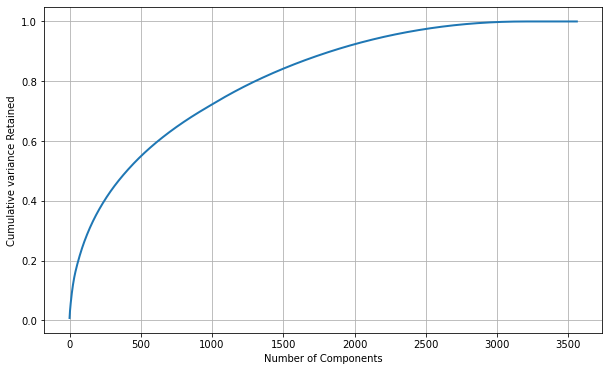

In [35]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(10, 6))
plt.clf()
plt.plot(cumulative_variance_retained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('Number of Components')
plt.ylabel('Cumulative variance Retained')
plt.show()

In [36]:
# Se determina el numero de componentes en base a la curva 
NComponents = 2297
svd = TruncatedSVD(n_components=NComponents, n_iter=7, random_state=42)
X_svd_train = svd.fit_transform(X_train)
X_svd_test = svd.transform(X_test)

In [37]:
print(X_svd_train.shape)
print(X_svd_test.shape)
print(y_train.shape)
print(y_test.shape)

(3560, 2297)
(1526, 2297)
(3560,)
(1526,)


In [38]:
#Optimización de Hiperparmetros

In [39]:
# accuracy on testing
#svc.score(X_svd_test, y_test)

In [41]:
#Grid search 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

#print(__doc__)

# Loading the Digits dataset     , readi
#digits = datasets.load_digits() , readi
 
# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
#X = digits.images.reshape((n_samples, -1))
#y = digits.target


# Split the dataset in two equal parts

   # X_svd_train, X_svd_test, y_train, y_test = train_test_split(  df2, test_size=0.5, random_state=0)
    

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(        SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.

# Tuning hyper-parameters for precision



C:\Users\gpulg\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gpulg\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gpulg\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gpulg\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedM

C:\Users\gpulg\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gpulg\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gpulg\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gpulg\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedM

Best parameters set found on development set:

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.193 (+/-0.000) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.193 (+/-0.000) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.193 (+/-0.000) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.193 (+/-0.000) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.518 (+/-0.013) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.193 (+/-0.000) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.673 (+/-0.045) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.518 (+/-0.013) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.654 (+/-0.055) for {'C': 1, 'kernel': 'linear'}
0.608 (+/-0.035) for {'C': 10, 'kernel': 'linear'}
0.581 (+/-0.059) for {'C': 100, 'kernel': 'linear'}
0.562 (+/-0.032) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

           

# 4.Modelamiento: Support Vector Machine (SVM)
Según Dubiau, se trata de un algoritmo o método supervisado de clasificación binaria en el que el entrenamiento de los datos consiste en encontrar un hiperplano óptimo que separe los vectores, los cuales representan los textos de un conjunto de datos (vectores de características), en dos grupos, considerando la mayor separación posible. Los vectores que establecen el margen de separación máxima se denominan support vectors (2013):



In [44]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
svc=SVC(kernel='linear',C=0.010, degree=3, coef0=0.0, class_weight='balanced')
scores = cross_val_score(svc, X_svd_train, y_train, cv=3, scoring='accuracy') # clases, 10?
svc = SGDClassifier(max_iter=100)
svc.fit(X_svd_train, y_train)


SGDClassifier(max_iter=100)

#5 Resultados: Evaluación
La evaluación se lleva a cabo en base a una métrica de exactitud, que representa el número de predicciones correctas sobre las predicciones totales del conjunto de prueba (Mishra, 2018). Esto quiere decir que tan exacta es la clasificación de los comentarios de los productos en relación a la polaridad del sentimiento que se expresa en cada uno.



In [46]:
predicted_sentiments = svc.predict(X_svd_test)
predicted_sentiments

array(['Neutral', 'Neutral', 'Positive', ..., 'Neutral', 'Neutral',
       'Positive'], dtype='<U8')

In [47]:
report = metrics.classification_report(y_true=y_test, 
                                           y_pred=predicted_sentiments, 
                                           labels=['Positive', 'Negative', 'Neutral'])
print(report)

              precision    recall  f1-score   support

    Positive       0.69      0.73      0.71       558
    Negative       0.36      0.16      0.22        88
     Neutral       0.78      0.80      0.79       880

    accuracy                           0.74      1526
   macro avg       0.61      0.56      0.57      1526
weighted avg       0.73      0.74      0.73      1526



Confusion matrix, without normalization
[[ 14  53  21]
 [ 16 703 161]
 [  9 141 408]]
Normalized confusion matrix
[[0.15909091 0.60227273 0.23863636]
 [0.01818182 0.79886364 0.18295455]
 [0.01612903 0.25268817 0.7311828 ]]


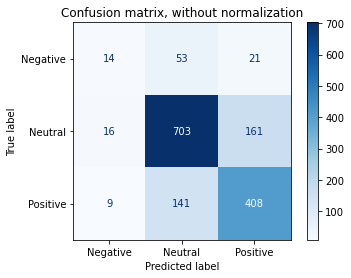

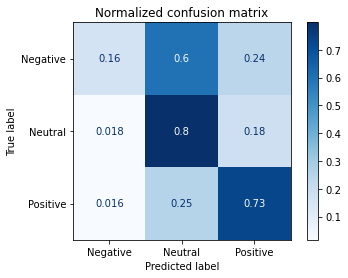

In [48]:
# Graficar matrices de confusión sin y con normalizacion 
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(svc, X_svd_test, y_test,
                                 display_labels=['Negative', 'Neutral', 'Positive'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()